# The Sparks Foundation: Graduate Rotational Internship Program
## Name: Nilesh Pendharkar
## Data Science & Business Analytics Intern at The Sparks Foundation

# Task 1: Prediction using Supervised ML
## *Predict the percentage of an student based on the no. of study hours*

## Table of contents:

1. Problem statement
2. About the dataset
3. Exploratory Data Analysis on data
4. Train-Test Split of data and model preparation
5. Making predictions
6. Conclusion


## 1. Problem Statement:
In this project, I build a simple linear regression model to study linear relationship between the score of student and the number of study hours. 

Our aim is to model and study the relationship.


In [1]:
# Importing neccessary libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. About the dataset:

The dataset contains data of students whose number of study hours and scores obtained by them, so the variables are hours and scores. The rows don't have any null values and data is in the format of CSV file with link given below.

Link: http://bit.ly/w-data

The dataset includes two features: No. of Study hours and Scores obtained by invidual student

In [2]:
# Importing a file called 'student_scores' which contains all information
df = pd.read_csv('student_scores.csv')

In [3]:
# visualising the table
df.head(10)

Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25

## 3. Exploratory Data Analysis on data:


In [4]:
# we have total 25 rows and 2 columns in dataset
df.shape

(25, 2)

In [5]:
# Visualising columns of dataframe
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
# Viewing any null value in data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

**Following insights can be drawn from the data:**

The maximum marks obtained by a student is 95 and minimum marks obtained are 17 in total of 25 students and no null values present.

The means of hours studied and scores obtained are 5.012 and 51.48 respectively.

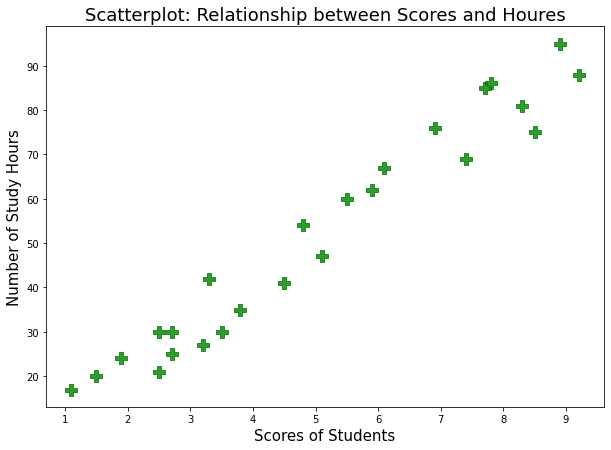

In [8]:
# plotting scores on x axis and hours on y axis
plt.figure(figsize=(10, 7))
plt.scatter(df['Hours'], df['Scores'], s= 140, color = 'g', alpha= 0.8, marker = 'P')
plt.xlabel('Scores of Students', fontsize = 15)
plt.ylabel('Number of Study Hours', fontsize = 15)
plt.title('Scatterplot: Relationship between Scores and Houres', fontsize = 18)
plt.show()

**The conclusions that can be made from above scatterplot diagrams are as follows:**

 There is a positive linear relation between the number of hours studied and percentage of score.



## Dependent Variable and Indepedent Variable in data:

In given project, Dependent variable is refered as feature variable and independent variable is refered as target variable.

As we have two variables,
Feature variable is Number of study hours and target variable is Scores obtained by student.

In [9]:
# Declaring the variables
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

# Scores and Hours data are given by X and y respectively

# Values attribute of pandas dataframe returns the numpy arrays

## Checking the diamensions of train and test data:

We need to check the dimensions of X and y to make sure they are in right format for Scikit-Learn API.

It is an important precursor to model building.

In [10]:
# Printing the diamensions of X and y
print(X.shape)
print(y.shape)

(25, 1)
(25,)


## Reshaping the diamensions

Reshaping of variables is important because given data is in 1D array instead of 2D array and it has single feature.

In [11]:
# Reshaping X and y
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [12]:
# Printing X and y after reshaping
print(X.shape)
print(y.shape)

(25, 1)
(25, 1)


## 4. Train-Test Split of data and model preparation:

In [13]:
# Spliting the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [14]:
# Printing the diamensions of X_train,X_test,y_train,y_test

print('X_train diamension:', X_train.shape)
print('X_test diamension:', X_test.shape)
print('y_train diamension:', y_train.shape)
print('y_test diamension:', y_test.shape)

X_train diamension: (16, 1)
X_test diamension: (9, 1)
y_train diamension: (16, 1)
y_test diamension: (9, 1)


In [15]:
# Defining the variabel and fitting the linear model

from sklearn.linear_model import LinearRegression

# defining the variable
reg = LinearRegression()
reg.fit(X_train, y_train)

print("Training is complete.")

# Predicting on test data
# y_pred = reg.predict(X_test)

Training is complete.


## Slope and intercept of line:

In [16]:
# finding the slope and intercept of linear regression
m = reg.coef_
c = reg.intercept_

print('The estimated slope is', m)
print('The estimated intercept is', c)

# plotting the regression line
line = m*X+c

The estimated slope is [[9.69062469]]
The estimated intercept is [2.50695476]


The values of estimated model slope and intercept are 0.0980 and 0.0173.

**So, our fitted linear regression line is Score = 0.0980 - Hour x 0.0173.**

## Visualizing train and test sets results with regression line:

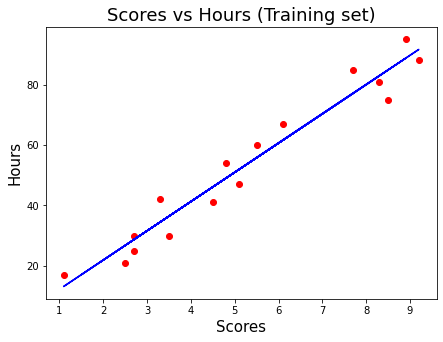

In [17]:
# Visualising training set result
plt.figure(figsize= (7, 5))
plt.scatter(X_train, y_train, color = 'r')
plt.plot(X, line, color = 'b')
plt.title('Scores vs Hours (Training set)', fontsize = 18)
plt.xlabel('Scores', fontsize = 15)
plt.ylabel('Hours', fontsize = 15)
plt.show()

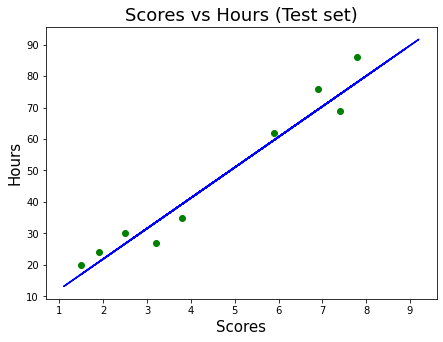

In [18]:
# Visualising the test set results
plt.figure(figsize= (7, 5))
plt.scatter(X_test, y_test, color = 'g')
plt.plot(X, line, color = 'b')
plt.title('Scores vs Hours (Test set)', fontsize = 18)
plt.xlabel('Scores', fontsize = 15)
plt.ylabel('Hours', fontsize = 15)
plt.show()

In [19]:
# Checking the mean accuracy of the model
reg.score(X_test, y_test)

0.9555700801388128

## 5. Making predictions:

As of now, we have trained our model, now it is time to predict.

In [20]:
# Making the prediction
y_pred = reg.predict(X_test)
y_pred

array([[17.04289179],
       [33.51695377],
       [74.21757747],
       [26.73351648],
       [59.68164043],
       [39.33132858],
       [20.91914167],
       [78.09382734],
       [69.37226512]])

In [21]:
# Predicting the score for 9.25 study hours
hours = 9.25
own_pred = reg.predict([[hours]])
print(f"Student who studies for {hours} is estimated to get a score {float(own_pred)}")

Student who studies for 9.25 is estimated to get a score 92.14523314523314


## 6. Conclusion:

**So I have successfully completed the task and predicted the score of 92.14 if a student studies for 9.25 hours.
also I have implemented the linear regression model and checked its mean accuracy.**